In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [25]:
class Perc ():
    def __init__(self,entrada,f=0,w0=-1,apz=0.1,vetori=[-0.5,0.5]):
        self.entrada = entrada
        self.entradas,self.saidas = self.conv_inp_out(entrada)
        self.total_entradas = len(self.entradas)
        self.x = f
        self.w0 = w0
        self.apz = apz
        self.pesos = []
        self.p0 = []
        self.vetori = vetori
    
    def conv_inp_out (self,entrada):
        dado = 'data/data/'+str(entrada)
        data = np.fromfile(str(dado))
        N = 3
        saidas_a=[]
        d_data = [data[n:n+N].tolist() for n in range(0, len(data), N)]
        for i in d_data:
            saidas_a.append(i[-1])
            i.pop()
        entradas_a = d_data
        return (entradas_a,saidas_a)
    
    def treino(self):
        
        p1 = self.vetori[0]
        p2 = self.vetori[1]
        for i in range(3):
            r = rd.uniform(p1,p2)
            self.p0.append(r)
        w0  = np.array(self.w0)


        print('Vetor de pesos Iniciais:',self.p0)

        for entrada in self.entradas:
            entrada.insert(0, -1)
        self.entradas = np.array(self.entradas)
        
        
        epcs = 0
        ajustes = 0
        while True:
            erro = False

            for i in range(self.total_entradas): 

                u = 0
                u = u + (np.vdot(self.entradas[i],self.p0))
                y = self.activate(u)

                if self.saidas[i]-y!=0.0:
                    erro_aux = self.saidas[i]-y
                    self.p0 = self.p0+(self.apz*erro_aux*(self.entradas[i]))
                    ajustes += 1
                    #print(p0)
                    self.pesos.append(self.p0)
                    erro = True
            epcs+=1
            if not erro:
                break

        print('a) Alterações no vetor de Pesos:',ajustes)
        print('Ultimo Vetor de Pesos: ',self.p0)
        print('-----------------------------------------------------------\n')
        print("b) Números de épocas até a convergência:",epcs)
        print('-----------------------------------------------------------\n')
        
        
    def activate(self,u):
        if u>0:
            return 1.0
        else:
            return 0.0
        
    def plots(self):
        plot_x_1 = []
        plot_y_1 = []
        plot_x_0 = []
        plot_y_0 = []

        plt.figure(figsize=(8,5))

        for i in range (0,1000):
            if self.saidas[i]==1.0:
                plot_x_1.append(self.entradas[i][1])
                plot_y_1.append(self.entradas[i][2])
            else:
                plot_x_0.append(self.entradas[i][1])
                plot_y_0.append(self.entradas[i][2])

        x = plot_x_1
        y = plot_y_1
        a = plot_x_0
        b = plot_y_0

        plt.scatter(x,y,s=3,alpha=1)
        plt.scatter(a,b,s=3,alpha=1, c='red')


        aaaa=[]
        bbbb = []
        for i in range(-(self.total_entradas),self.total_entradas):
            aaaa.append(i)
            bbbb.append((self.p0[0]/self.p0[2])-(self.p0[1]/self.p0[2])*i)

        plt.scatter(aaaa,bbbb,s=0.1,alpha=0.5, c='black')

        print('c) Gráfico gerado')

        plt.show() 
    

## Parte I - Resolvendo um Problema Linearmente Separável

In [26]:
rede = Perc(entrada='dataAll.txt',f=0,w0=-1,apz=0.1,vetori=[-0.5,0.5])

In [27]:
rede.treino()

Vetor de pesos Iniciais: [-0.3512909365500013, 0.16951949322278503, 0.22156906244717267]
a) Alterações no vetor de Pesos: 218
Ultimo Vetor de Pesos:  [  -2.55129094  633.31083949 -631.64032094]
-----------------------------------------------------------

b) Números de épocas até a convergência: 18
-----------------------------------------------------------



c) Gráfico gerado


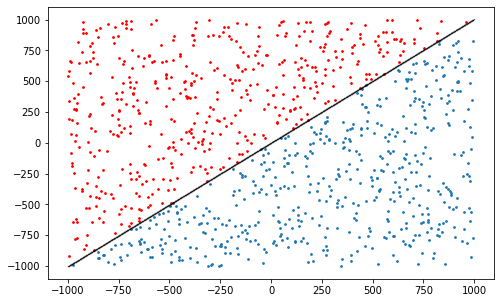

In [28]:
rede.plots()

In [33]:
entrada_txt = 'data0.txt'
tx_aprendizados = [0.4,0.1,0.01]
vrandoms = [[-100,100],[-0.5,0.5]]

for  tx in tx_aprendizados:
    for v_random in vrandoms:
        print('Taxa de aprendizado: ',tx)
        print('Intervalo de Pesos: ',v_random)
        rede1 = Perc(entrada=entrada_txt,f=0,w0=-1,apz=tx,vetori=v_random)
        rede1.treino()

Taxa de aprendizado:  0.4
Intervalo de Pesos:  [-100, 100]
Vetor de pesos Iniciais: [-52.19974056100198, 30.90992680975674, -13.197263501708818]
a) Alterações no vetor de Pesos: 271
Ultimo Vetor de Pesos:  [6.60025944 3.23433209 9.98654871]
-----------------------------------------------------------

b) Números de épocas até a convergência: 6
-----------------------------------------------------------

Taxa de aprendizado:  0.4
Intervalo de Pesos:  [-0.5, 0.5]
Vetor de pesos Iniciais: [-0.13353412997477432, 0.4186644158486408, 0.24987940574290957]
a) Alterações no vetor de Pesos: 3
Ultimo Vetor de Pesos:  [0.26646587 0.03847876 0.60343272]
-----------------------------------------------------------

b) Números de épocas até a convergência: 2
-----------------------------------------------------------

Taxa de aprendizado:  0.1
Intervalo de Pesos:  [-100, 100]
Vetor de pesos Iniciais: [-35.70740699484088, 24.259057055935983, -40.97475714159435]
a) Alterações no vetor de Pesos: 1164
Ulti

In [ ]:
vetori=[-0.5,0.5]
vetori[0]